In [1]:
from __future__ import division #(for python 2.7 compatibility)
import par
import modes
import spectra
import numpy as np
import numba
import matplotlib.pyplot as plt
import pickle

precomputing bessel functions...

bessel functions precomputed.



In [2]:
A = np.linspace(par.a0, par.a_rec, 2*par.NT)
K = np.linspace(1,1000,par.NK)

#@numba.njit
def square_basis(NC, theta):
    height = par.NT//NC
    width = par.NK//NC
    out = np.zeros((par.NK, par.NT))
    for i in range(NC**2):
        r,c = i//NC, i%NC
        out[r*width:(r+1)*width, c*height:(c+1)*height] = theta[i]
    out[:,A[::2] < par.a0_pca]=0
    return out

#@numba.njit
def get_square(n, val):
    height = par.NT//par.NC
    width = par.NK//par.NC
    out = np.zeros((par.NK, par.NT))
    r,c = n//par.NC, n%par.NC
    out[r*width:(r+1)*width, c*height:(c+1)*height] = val
    out[:,A[::2] < par.a0_pca]=0
    return out


In [3]:
def get_PC(NC):
    Cl_err = spectra.get_Cl_err()
    J = pickle.load(open("data/J_cs2_"+str(NC)+".p", "rb"))
    Sigma = np.diag(Cl_err)


    # just using Identity as covariance matrix for now
    F = np.transpose(J)@Sigma@J
    u, s, v = np.linalg.svd(F)
    D, V = np.linalg.eig(F)
    # principal vectors are currently defined as the rank-ordered left singular vectors
    PV = np.real(u) 
    #PC = B@PV
    plt.show()
    PC = np.zeros((10, par.NK, par.NT))
    for i in range(10):
        PC[i,:,:] = square_basis(NC, PV[:,i])
        PC[i,:,:] = PC[i,:,:]/np.sum(PC[i,:,:]**2)
    return PC

In [14]:
PC_16 = get_PC(16)
PC_32 = get_PC(32)
PC_64 = get_PC(64)
PC_128 = get_PC(128)

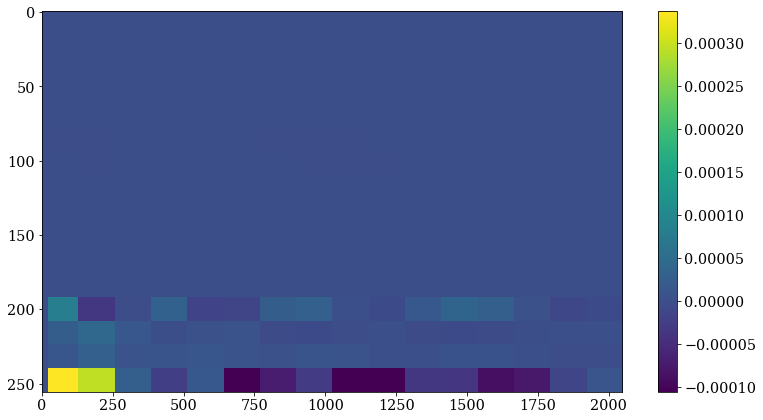

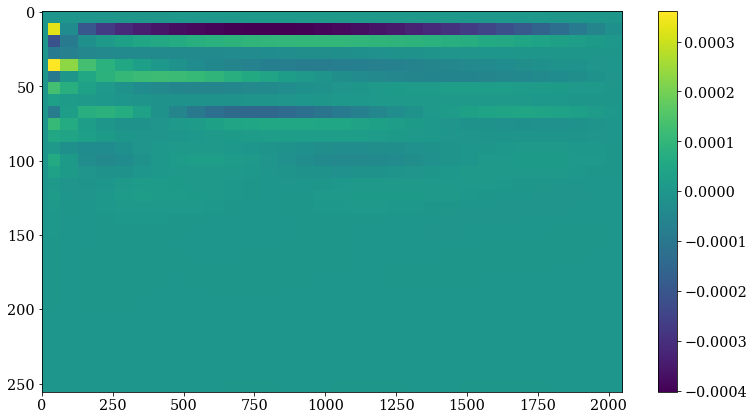

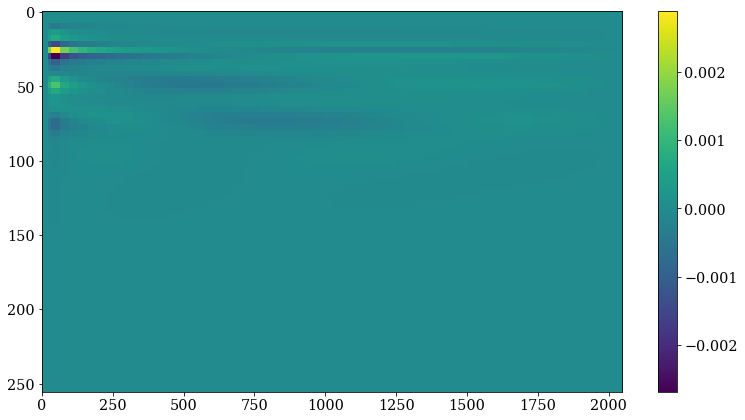

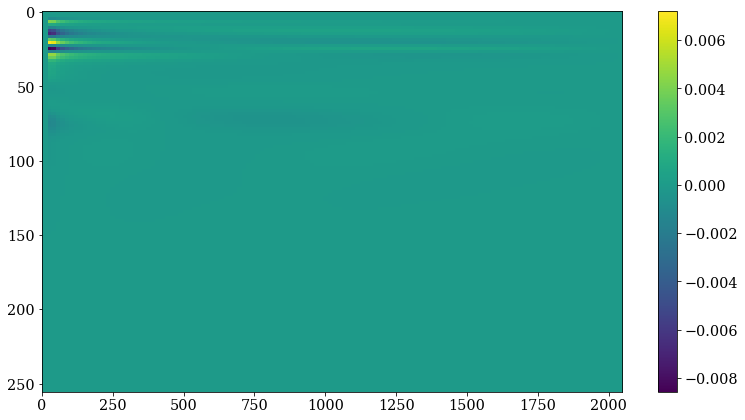

In [46]:
#pickle.dump(PC_32, open("data/PC_cs2_32.p", "wb"))
#pickle.dump(PC_128, open("data/PC_cs2_32.p", "wb"))
n = 10
plt.rcParams.update(par.plot_params)
plt.imshow(PC_16[n-1],aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(PC_32[n-1],aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(PC_64[n-1],aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(PC_128[n-1],aspect='auto')
plt.colorbar()

<IPython.core.display.Javascript object>


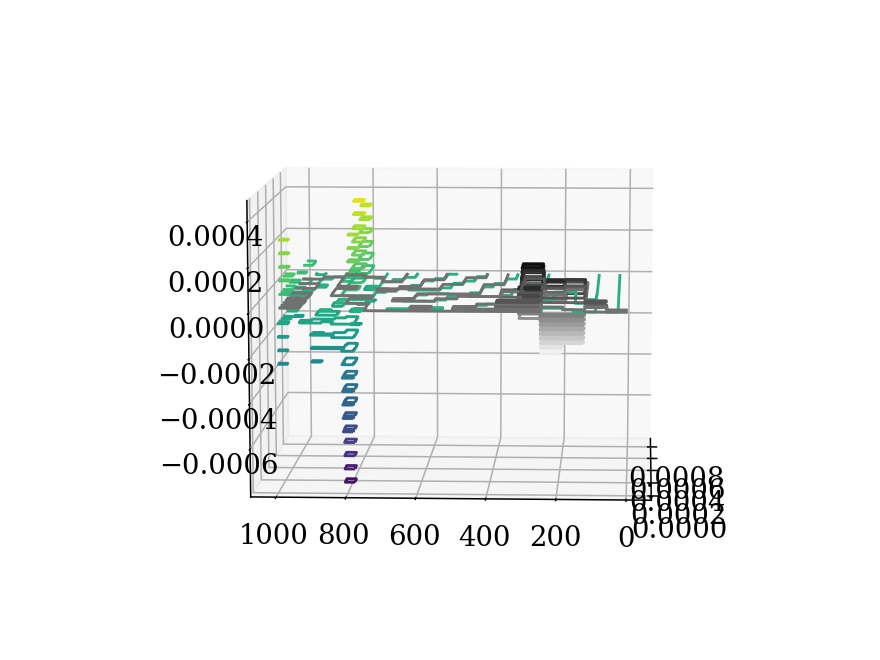

In [118]:
from mpl_toolkits import mplot3d
from matplotlib import cm
%matplotlib notebook
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(A[::2], K)
ax.contour3D(X,Y, PC_16[4], 20, cmap='binary')
ax.contour3D(X,Y, PC_32[4], 20)
#ax.plot_surface(X,Y, -PC[5],cmap=cm.coolwarm)
#plt.show()
#ax.plot_wireframe(X,Y, PC_16[1], rstride = 50, cstride=200 )
#ax.plot_wireframe(X,Y, PC_32[1], rstride = 10, cstride=100,color='red')